# Marketing Analytics For E-Commerce Market Place Company

## Business Context:

The client is one of the leading online market place in India and would like partner with Analytixlabs. 
Client wants help in measuring, managing and analysing performance of business.
Analytixlabs has hired you as an analyst for this project where client asked you to provide data 
driven insights about business and understand customer, seller behaviors, product behavior and 
channel behavior etc...

## Business Objective:
The below are few Sample business questions to be addressed as part of this analysis.

### Import necessary libraries

In [2]:
import pandas as pd

### Import the data sets

In [3]:
customers = pd.read_csv('CUSTOMERS.csv')
sellers = pd.read_csv('SELLERS.csv')
products = pd.read_csv('PRODUCTS.csv')
orders = pd.read_csv('ORDERS.csv')
order_items = pd.read_csv('ORDER_ITEMS.csv')
order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
order_review_ratings = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
geo_location = pd.read_csv('GEO_LOCATION.csv')

### Exploratory Data Analysis

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [5]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [8]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [9]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [10]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [12]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [14]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [16]:
# Converting orders's order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date to datetime

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format = '%m/%d/%Y %H:%M')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format = '%m/%d/%Y %H:%M')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], format = '%m/%d/%Y %H:%M')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format = '%m/%d/%Y %H:%M')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format = '%m/%d/%Y %H:%M')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26


In [17]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [18]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [19]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [21]:
## coverting order_items's shipping_limit_date to datetime
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"], format="%m/%d/%Y %H:%M")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14


In [22]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [23]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [24]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [26]:
order_review_ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [27]:
order_review_ratings.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [28]:
order_review_ratings.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [29]:
## converting order_review_ratings's review_creation_date & review_answer_timestamp to datetime
order_review_ratings["review_creation_date"] = pd.to_datetime(order_review_ratings["review_creation_date"], format="%m/%d/%Y %H:%M")
order_review_ratings["review_answer_timestamp"] = pd.to_datetime(order_review_ratings["review_answer_timestamp"], format="%m/%d/%Y %H:%M")
order_review_ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00


In [30]:
order_review_ratings.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [31]:
geo_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [32]:
geo_location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [33]:
geo_location.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

## Q1. 
### (a) Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [34]:
total_revenue = order_payments.drop_duplicates(keep = 'first')['payment_value'].sum()
print('Total Revenue:', total_revenue)

total_quantity = order_items['order_item_id'].count()
print('Total Quantity:', total_quantity)

total_products = products['product_id'].count()
print('Total Products:', total_products)

total_categories = len(products['product_category_name'].unique())
print('Total Categories:', total_categories)

total_sellers = sellers['seller_id'].count()
print('Total Sellers:', total_sellers)

total_locations = geo_location['geolocation_zip_code_prefix'].count()
print('Total Locations:', total_locations)

total_payment_methods = len(order_payments['payment_type'].unique())
print('Total Channels & Payment Methods:', total_payment_methods)

Total Revenue: 16008872.12
Total Quantity: 112650
Total Products: 32951
Total Categories: 72
Total Sellers: 3095
Total Locations: 19015
Total Channels & Payment Methods: 5


### (b) Understanding how many new customers acquired every month

In [35]:
orders_ = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'left')
orders_['year_month'] = orders_['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07


In [36]:
new_cust = orders_.drop_duplicates(subset = 'customer_unique_id', keep = 'first').groupby('year_month')['customer_unique_id'].count().reset_index()
new_cust

,year_month,customer_unique_id
0,2016-09,4
1,2016-10,315
2,2017-01,749
3,2017-02,1727
4,2017-03,2595
5,2017-04,2318
6,2017-05,3533
7,2017-06,3103
8,2017-07,3864
9,2017-08,4144


### (c) Understand the retention of customers on month on month basis

In [37]:
#orders_.loc[orders_['purchase_yearmonth'] == '2016-10', 'customer_unique_id'].nunique()

In [38]:
#total_cust = orders_.drop_duplicates().groupby('year_month')['customer_unique_id'].count().reset_index()
total_cust = orders_.groupby('year_month')['customer_unique_id'].nunique().reset_index()
new_cust = orders_.drop_duplicates(subset = 'customer_unique_id', keep = 'first').groupby('year_month')['customer_unique_id'].count().reset_index()

In [39]:
retained_cust = pd.merge(left = total_cust, right = new_cust, on = 'year_month', how = 'left')

In [40]:
retained_cust['retained'] = retained_cust['customer_unique_id_x'] - retained_cust['customer_unique_id_y']
retained_cust

,year_month,customer_unique_id_x,customer_unique_id_y,retained
0,2016-09,4,4.0,0.0
1,2016-10,321,315.0,6.0
2,2016-12,1,NaN,NaN
3,2017-01,765,749.0,16.0
4,2017-02,1755,1727.0,28.0
5,2017-03,2642,2595.0,47.0
6,2017-04,2372,2318.0,54.0
7,2017-05,3625,3533.0,92.0
8,2017-06,3180,3103.0,77.0
9,2017-07,3947,3864.0,83.0


In [41]:
orders_.loc[orders_['year_month'] == '2018-09', 'customer_unique_id']#.drop_duplicates()


1087     ef0103e9602d12594d19c2b666219bc1
3742     968fac81e2c44fb6c1e3ac2a45e6a102
21256    09687a7b7431a93b5c53b50ba779bf94
33139    9c3af16efacb7aa06aa3bc674556c5d6
34979    ba84da8c159659f116329563a0a981dd
41350    08642cd329066fe11ec63293f714f2f8
48314    76e5f3bca2b1f5c510c41563c2ea31a4
50487    230a1e9f42924d41f37fd22a1d4a9707
50911    0a5dadb73145d29f42f703c97c377ae8
52969    af5454198a97379394cacf676e1e96cb
55235    d05c44a138277ad325d915c6b7ccbcdf
66296    ff22e30958c13ffe219db7d711e8f564
70913    c1ee153508c6b785b491443a95ff364e
75807    ba84da8c159659f116329563a0a981dd
75985    9bb92bebd4cb7511e1a02d5e50bc4655
93373    ef0103e9602d12594d19c2b666219bc1
Name: customer_unique_id, dtype: object

In [42]:
orders_ = (orders.join(customers.set_index(["customer_id"]), on=["customer_id"])).copy()
orders_["purchase_yearmonth"] = orders_['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_.sort_values(by=["purchase_yearmonth"], inplace=True, ascending=[True], ignore_index=True)
groups = orders_.groupby(["purchase_yearmonth"])
prev_month_customers = set()
retention_customers_details = []
flag = False
for (group_name, group) in groups:
    retained = set(group.customer_unique_id.unique()).intersection(prev_month_customers)
    if flag:
        retention_customers_details.append({"Month": group_name, "Retained_customers": len(retained), "Prev_Month_Customers": len(prev_month_customers)})
    prev_month_customers = set(group.customer_unique_id.unique())
    flag = True

retention_customers_details_df = pd.DataFrame(retention_customers_details)
#retention_customers_details_df

In [43]:
orders_ = (orders.join(customers.set_index(["customer_id"]), on=["customer_id"])).copy()
orders_["purchase_yearmonth"] = orders_['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_.sort_values(by=["purchase_yearmonth"], inplace=True, ascending=[True], ignore_index=True)
groups = orders_.groupby(["purchase_yearmonth"])

In [44]:
prev_month_customers = set()
retention_customers_details = []

In [45]:
len(prev_month_customers)

0

In [46]:
type(retention_customers_details)

list

In [47]:
retention_customers_details

[]

In [48]:
set(group.customer_unique_id.unique()).intersection(prev_month_customers)

set()

In [49]:
for (group_name, group) in groups:
    retained = set(group.customer_unique_id.unique()).intersection(prev_month_customers)

In [50]:
retained

set()

In [51]:
group.customer_unique_id.unique()

array(['634420a0ea42302205032ed44ac7fccc',
       '262e1f1e26e92e86375f86840b4ffd63',
       '87ab9fec999db8bd5774917de3cdf01c',
       'af5454198a97379394cacf676e1e96cb'], dtype=object)

In [52]:
a= set(orders_.loc[orders_['purchase_yearmonth'] == '2016-09', 'customer_unique_id'].unique())

In [53]:
b = set(orders_.loc[orders_['purchase_yearmonth'] == '2016-8', 'customer_unique_id'].unique())

In [54]:
c = b.intersection(a)

In [55]:
len(c)

0

In [56]:
orders_.loc[orders_['purchase_yearmonth'] == '2016-10', 'customer_unique_id'].nunique()

321

### (d) How the revenues from existing/new customers on month on month basis

In [57]:
orders_ = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'left')
orders_['year_month'] = orders_['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07


In [58]:
orders_revenue = pd.merge(left = orders_, right = order_payments, on = 'order_id', how = 'left')
orders_revenue.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07,1.0,credit_card,8.0,252.25


In [59]:
new = orders_revenue.drop_duplicates(subset = 'customer_unique_id', keep = 'first').groupby('year_month')['payment_value'].sum().reset_index()
new

,year_month,payment_value
0,2016-09,252.24
1,2016-10,56990.07
2,2017-01,129262.82
3,2017-02,279455.35
4,2017-03,430270.86
5,2017-04,390268.41
6,2017-05,554778.25
7,2017-06,482425.82
8,2017-07,557405.55
9,2017-08,634243.36


In [60]:
existing = orders_revenue.groupby('year_month')['payment_value'].sum().reset_index()
existing

,year_month,payment_value
0,2016-09,252.24
1,2016-10,59090.48
2,2016-12,19.62
3,2017-01,138488.04
4,2017-02,291908.01
5,2017-03,449863.60
6,2017-04,417788.03
7,2017-05,592918.82
8,2017-06,511276.38
9,2017-07,592382.92


In [61]:
revenue_details = pd.merge(new, existing, on = 'year_month', how = 'left')
revenue_details

,year_month,payment_value_x,payment_value_y
0,2016-09,252.24,252.24
1,2016-10,56990.07,59090.48
2,2017-01,129262.82,138488.04
3,2017-02,279455.35,291908.01
4,2017-03,430270.86,449863.60
5,2017-04,390268.41,417788.03
6,2017-05,554778.25,592918.82
7,2017-06,482425.82,511276.38
8,2017-07,557405.55,592382.92
9,2017-08,634243.36,674396.32


### (e) Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

<AxesSubplot:title={'center':'Trend of Sales by Month'}, xlabel='year_month'>

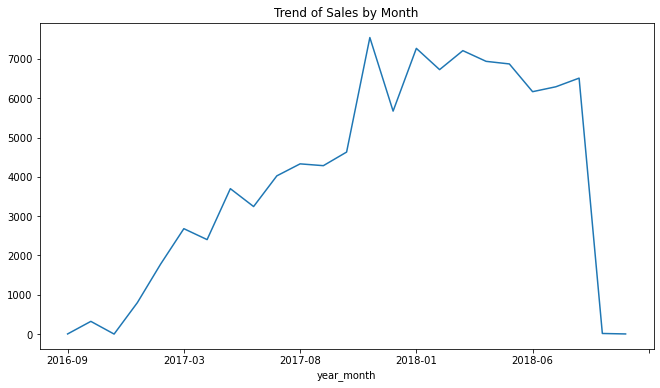

In [62]:
# trend of sales by month

orders_monthly = orders.copy()
orders_monthly['year_month'] = orders_monthly['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_monthly.groupby('year_month')['order_id'].count().plot.line(figsize = (11,6), title = 'Trend of Sales by Month')

<AxesSubplot:title={'center':'Trend of Sales by Category'}, ylabel='product_category_name'>

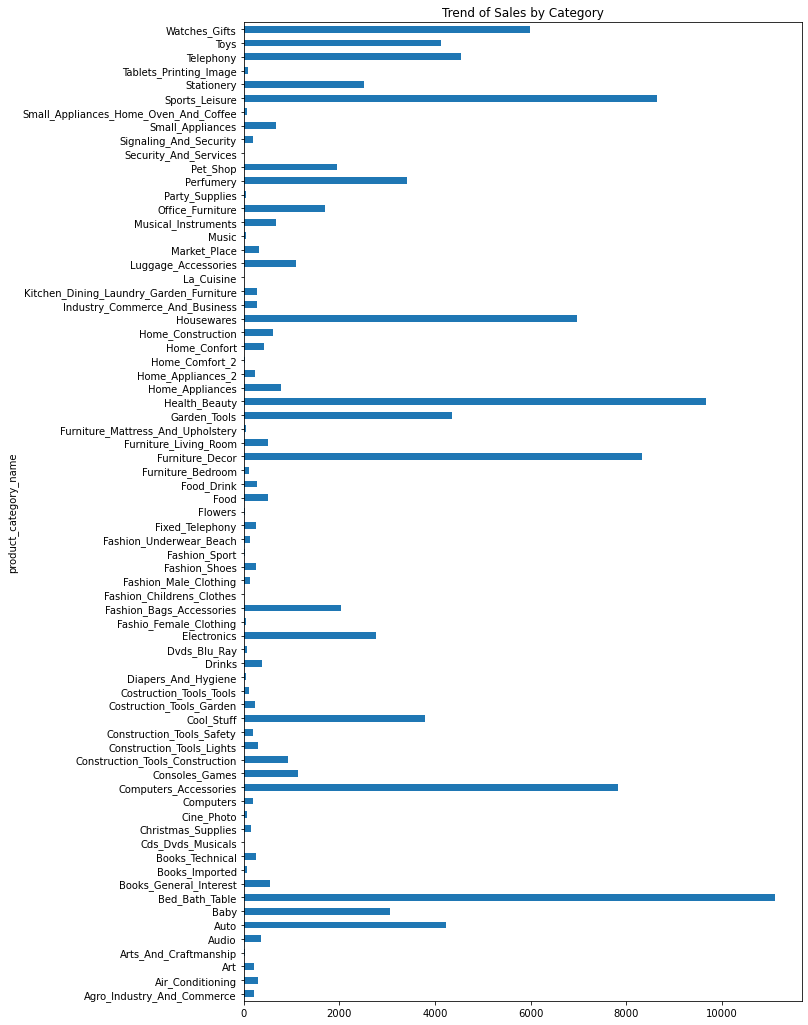

In [63]:
# trend of sales by category

sales = pd.merge(pd.merge(orders, order_items, on = 'order_id'), products, on = 'product_id')
sales.groupby('product_category_name')['order_id'].count().plot.barh(figsize = (10, 18), title = 'Trend of Sales by Category')

<AxesSubplot:title={'center':'Trend of Sales by Location'}, xlabel='customer_state'>

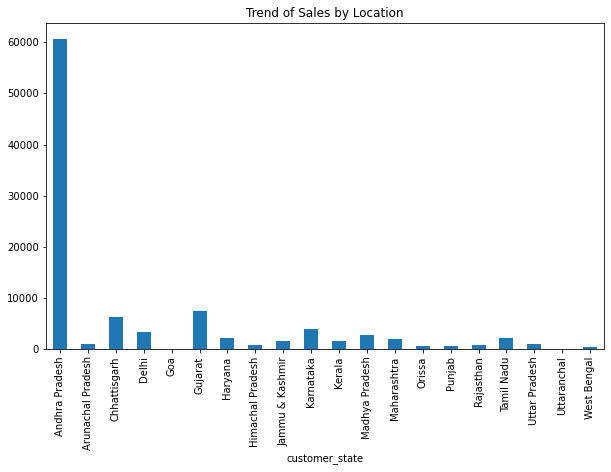

In [64]:
# trend of sales by location

orders_ = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'left')
orders_.groupby('customer_state')['order_id'].count().plot.bar(figsize = (10, 6), title = 'Trend of Sales by Location')

<AxesSubplot:title={'center':'Trend of Sales by Week'}, xlabel='purchase_week'>

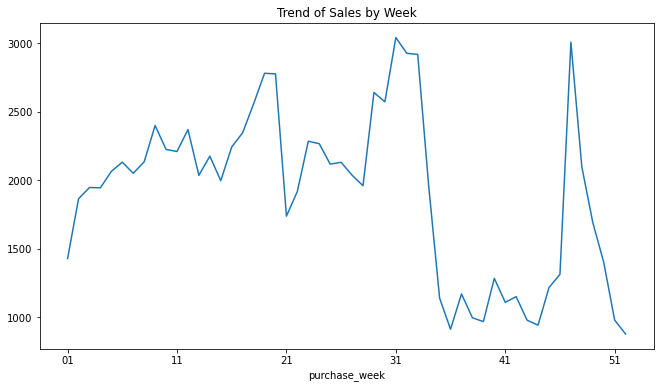

In [65]:
# trend of sales by week of year

orders_monthly = orders.copy()
orders_monthly['purchase_week'] = orders_monthly['order_purchase_timestamp'].dt.strftime('%W')
orders_monthly.groupby('purchase_week')['order_id'].count().plot.line(figsize = (11,6), title = 'Trend of Sales by Week')

<AxesSubplot:title={'center':'Trend of Sales by Day'}, xlabel='year_day'>

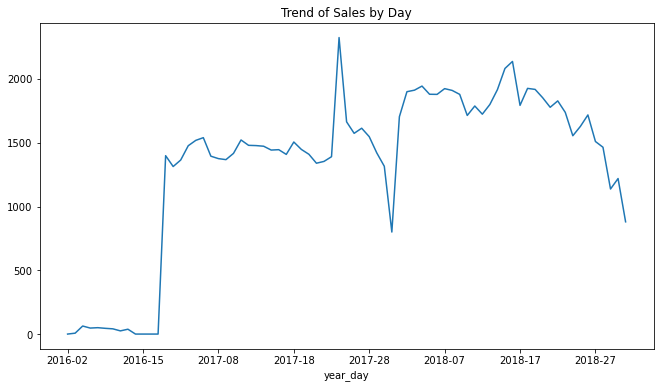

In [66]:
# trend of sales by day

orders_monthly = orders.copy()
orders_monthly['year_day'] = orders_monthly['order_purchase_timestamp'].dt.strftime('%Y-%d')
orders_monthly.groupby('year_day')['order_id'].count().plot.line(figsize = (11,6), title = 'Trend of Sales by Day')

<AxesSubplot:title={'center':'Order trend by day Payment Type'}, xlabel='payment_type'>

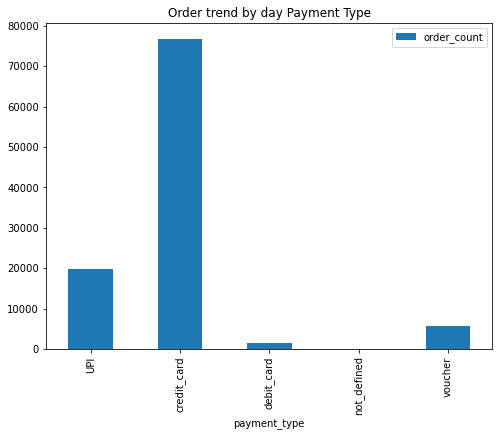

In [68]:
# order trend by payment method

orders_ = orders.copy()
orders_ = orders_.join(order_payments.set_index(["order_id"]), on=["order_id"])
orders_.groupby(["payment_type"]).agg(order_count=("order_id", "count")).plot.bar(title="Order trend by day Payment Type", figsize=(8, 6))